####Required Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import seaborn as sns 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import sklearn 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 

####Data Reading / Importing Data
##### head values , info - datatype , columns

In [2]:
dataset = pd.read_csv('CO2 Emissions_dataset.csv')
dataset.shape

(7385, 13)

In [3]:
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2


In [4]:
dataset.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'classify '],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  classi

####Data Cleaning 

Null Values : No Null values are found 

Missing values : NA, N/A, na, --, NAN, n/a :  no such values 

Duplicate values : 1103 duplicates out of 7385 : drop the duplicate values 

Outliers : using Box plot : not so evident outliers in features 
outliers in CO2 emission but that are values to be predicted 
can use scatter plot, quatile range for outliers 




In [6]:
dataset.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
classify                            0
dtype: int64

In [7]:
dataset.duplicated().sum()

1103

In [8]:
missing_values = ["n/a", "na", "--","NA","NAN","N/A"]

In [9]:
pd.read_csv("CO2 Emissions_dataset.csv", na_values = missing_values)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [10]:
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [11]:
dataset.duplicated().sum()

1103

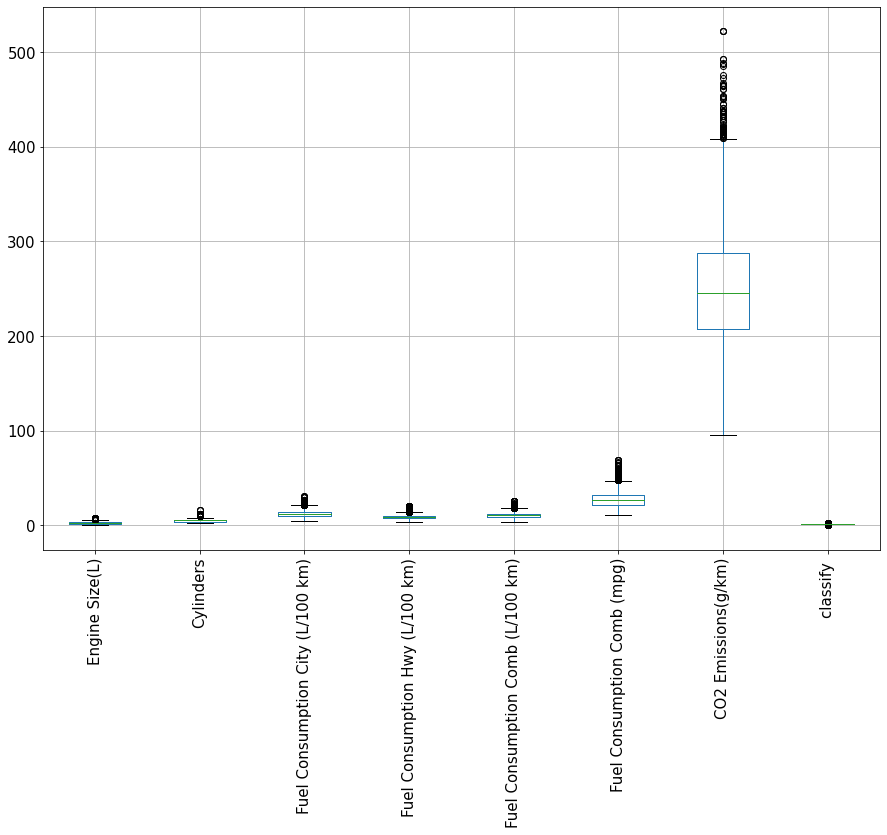

In [12]:
dataset.boxplot(figsize=(15,10),rot=90, fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


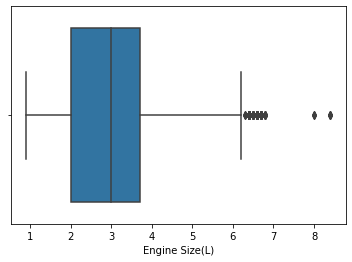

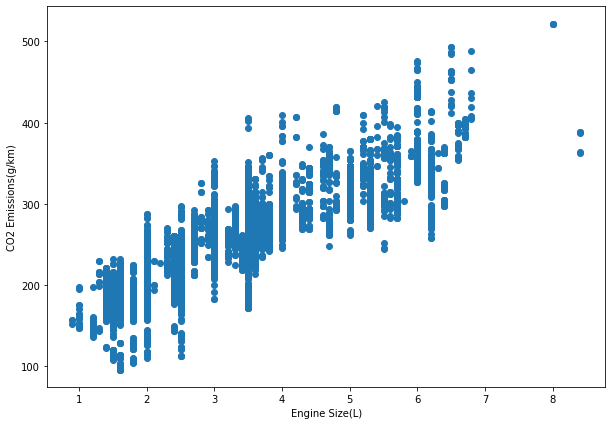

(array([ 945,  946, 1431, 2544, 3616, 4509, 5575, 6640]),)


In [13]:
#check outliners 

#boxplot for  
sns.boxplot(dataset['Engine Size(L)'])

#scatter plot
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(dataset['Engine Size(L)'], dataset['CO2 Emissions(g/km)'])
# x-axis label
ax.set_xlabel('Engine Size(L)')
# y-axis label
ax.set_ylabel('CO2 Emissions(g/km)')
plt.show()

#position of outlier
print(np.where((dataset['Engine Size(L)']>7.5)))

#can try outliers from interquatlie and z score also 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


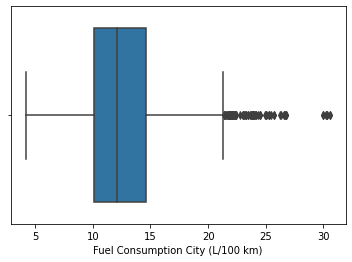

In [14]:
#check outliners 

#boxplot for  
sns.boxplot(dataset['Fuel Consumption City (L/100 km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


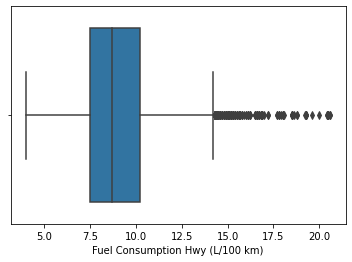

In [15]:
sns.boxplot(dataset['Fuel Consumption Hwy (L/100 km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


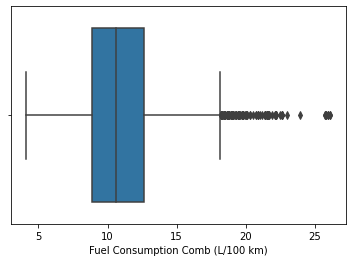

In [16]:
sns.boxplot(dataset['Fuel Consumption Comb (L/100 km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


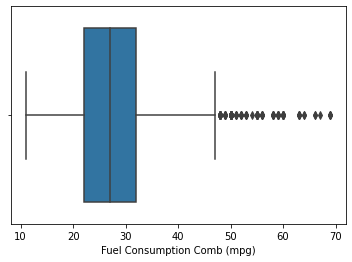

In [17]:
sns.boxplot(dataset['Fuel Consumption Comb (mpg)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 349, 1743, 2434, 2663, 2873, 2971, 3959, 3961, 4049, 4509, 5025,
       5026, 5027, 5028, 5126, 5511, 5575, 6045, 6046, 6640, 7058, 7059]),)


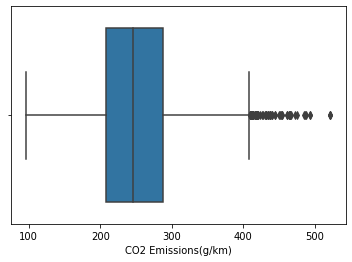

In [18]:
sns.boxplot(dataset['CO2 Emissions(g/km)'])
#position of outlier
print(np.where((dataset['CO2 Emissions(g/km)']>450)))

In [19]:
# Putting different transmission sub-catagories into their respective catagories


dataset['Transmission'] = np.where(dataset['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['M5','M6','M7']),'Manual',dataset['Transmission'])

In [20]:
# Renaming fuel types for better understanding

print(dataset['Fuel Type'].value_counts())

dataset['Fuel Type']= np.where(dataset['Fuel Type']=='X','Regular gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='Z','Premium gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='E','Ethanol',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='D','Diesel',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='N','Natural gas',dataset['Fuel Type'])

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64


In [21]:
# checking for unique variables
print(dataset['Make'].unique())
print("\n")
print(dataset['Model'].unique())
print("\n")
print(dataset['Vehicle Class'].unique())
print("\n")
print(dataset['Fuel Type'].unique())
print("\n")
print(dataset['Transmission'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


['Automatic of Selective type' 'Manual' 'CVT' 'Automated Manual'
 'Automatic']


####Exploratory Data Analysis 

basic values like mean, median, standard deviation, minimum, maximum, quatile range

correlation coeiffient values among the features to know the dependence will help us decide the main features while modelling the data

Using scatter plots and other graphical representation to know the distribution and dependence.


In [22]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0
classify,7385.0,1.989032,0.629290,0.0,2.0,2.0,2.0,3.0


In [23]:
dataset.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145,0.747118
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644,0.710114
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592,0.795626
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536,0.767552
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052,0.795531
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426,-0.819123
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000,0.870707
classify,0.747118,0.710114,0.795626,0.767552,0.795531,-0.819123,0.870707,1.000000


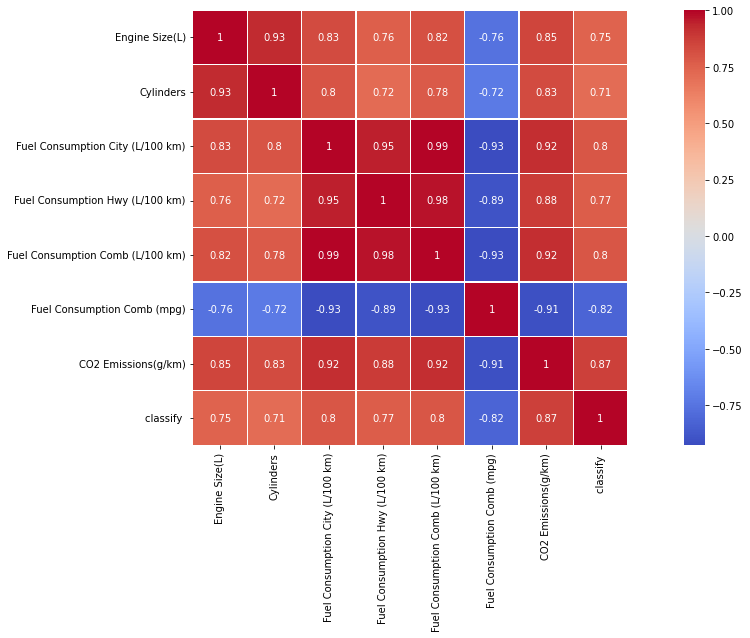

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(data=dataset.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True)

In [25]:
dataset.corr()['CO2 Emissions(g/km)'].sort_values()

Fuel Consumption Comb (mpg)        -0.907426
Cylinders                           0.832644
Engine Size(L)                      0.851145
classify                            0.870707
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption City (L/100 km)    0.919592
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

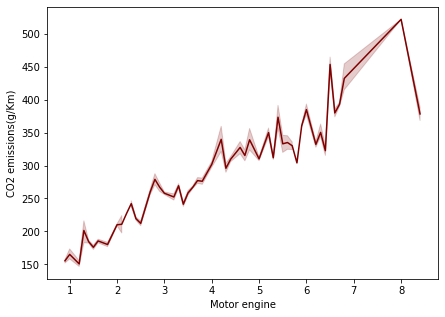

In [26]:
#Line Plot for Engine Size vs Emission
plt.figure(figsize=(7,5))
sns.lineplot(x=dataset['Engine Size(L)'], y=dataset['CO2 Emissions(g/km)'], color = 'maroon')
plt.xlabel('Motor engine')
plt.ylabel('CO2 emissions(g/Km)')
plt.show()

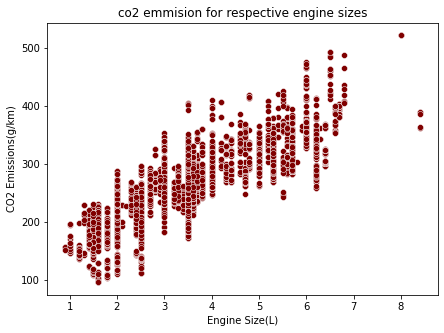

In [27]:
# Scatter Plot for Engine size vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Engine Size(L)', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective engine sizes')
plt.show()

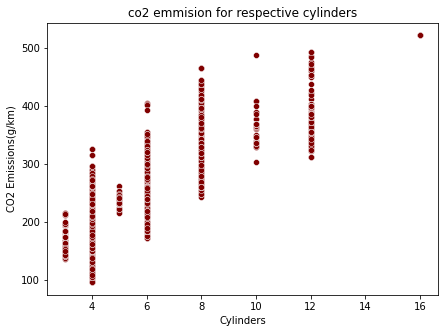

In [28]:
# Scatter Plot for Cylinders vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Cylinders', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective cylinders')
plt.show()

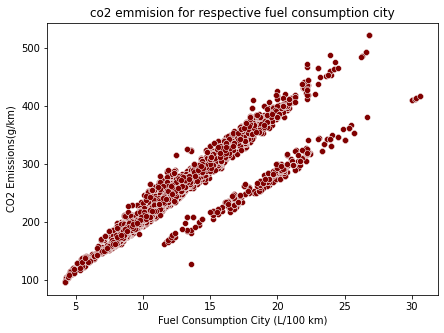

In [29]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective fuel consumption city')
plt.show()

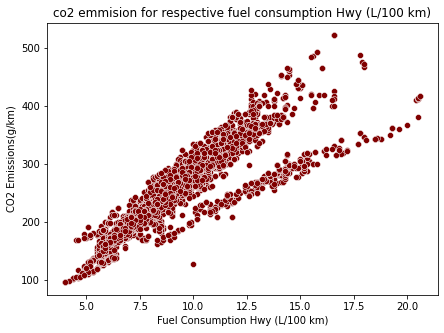

In [30]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective fuel consumption Hwy (L/100 km)')
plt.show()

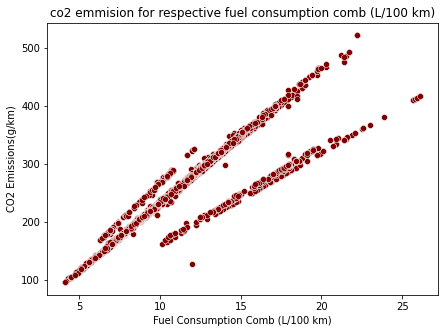

In [31]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective fuel consumption comb (L/100 km)')
plt.show()

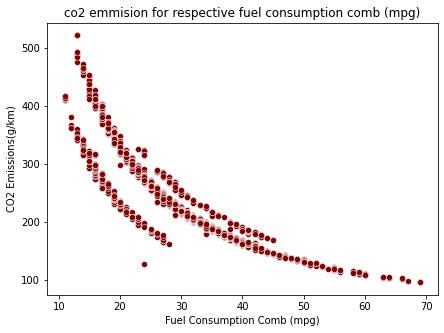

In [32]:
# Scatter Plot for Fuel Consumption vs Emission
f, ax = plt.subplots(figsize=(7,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.scatterplot(data=dataset,x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective fuel consumption comb (mpg)')
plt.show()

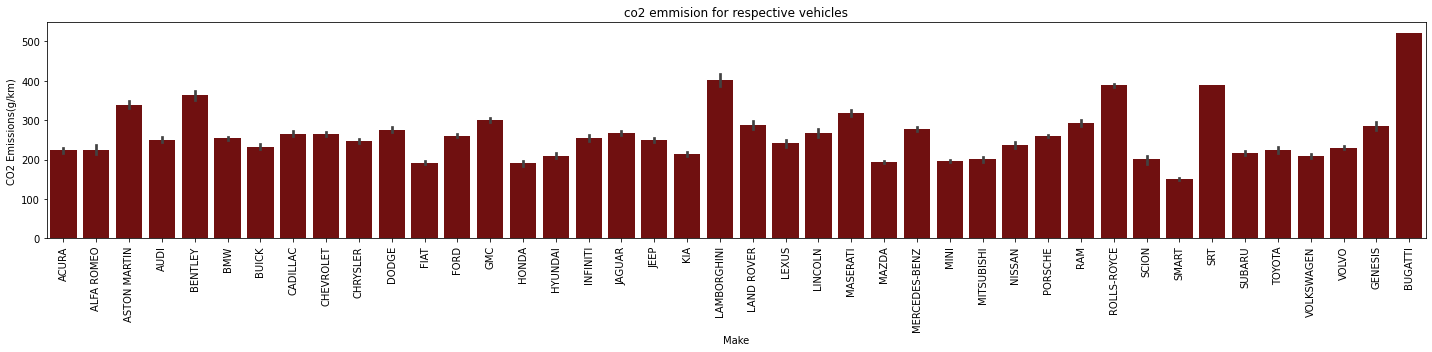

In [33]:
#BarPlot for Company manufacturing Vs. Emission 
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values(ascending=False)
ax = sns.barplot(data=dataset,x='Make', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective vehicles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
#Barplot for Model vs. Emission 
#f, ax = plt.subplots(figsize=(20,5))
#x = dataset.Make.value_counts().sort_values()
#ax = sns.barplot(data=dataset,x='Model', y='CO2 Emissions(g/km)',color='maroon')
#plt.title('co2 emmision for respective Models ')
#plt.xticks(rotation=90)
#plt.show()

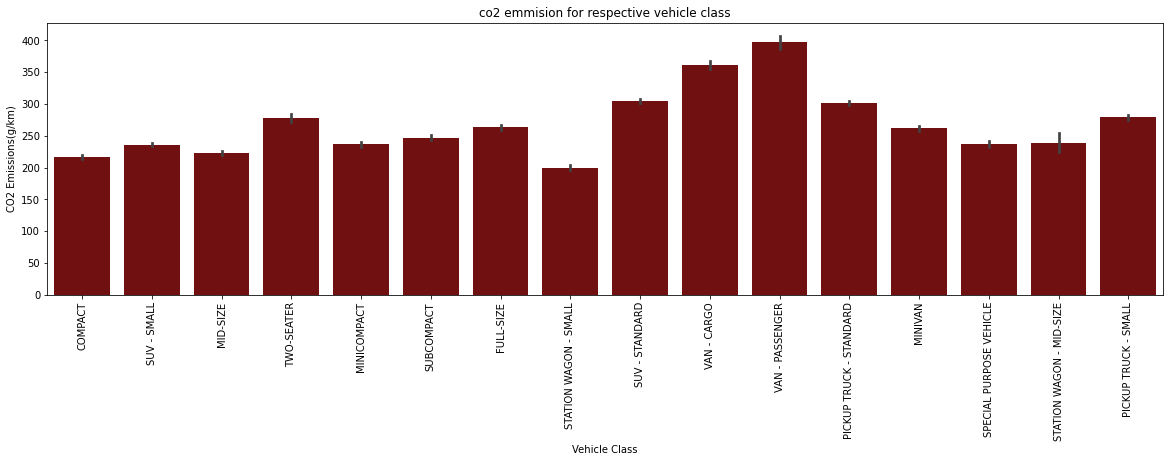

In [35]:
#BarPlot for Vehicle Class vs. Emission
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Vehicle Class', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective vehicle class')
plt.xticks(rotation=90)
plt.show()

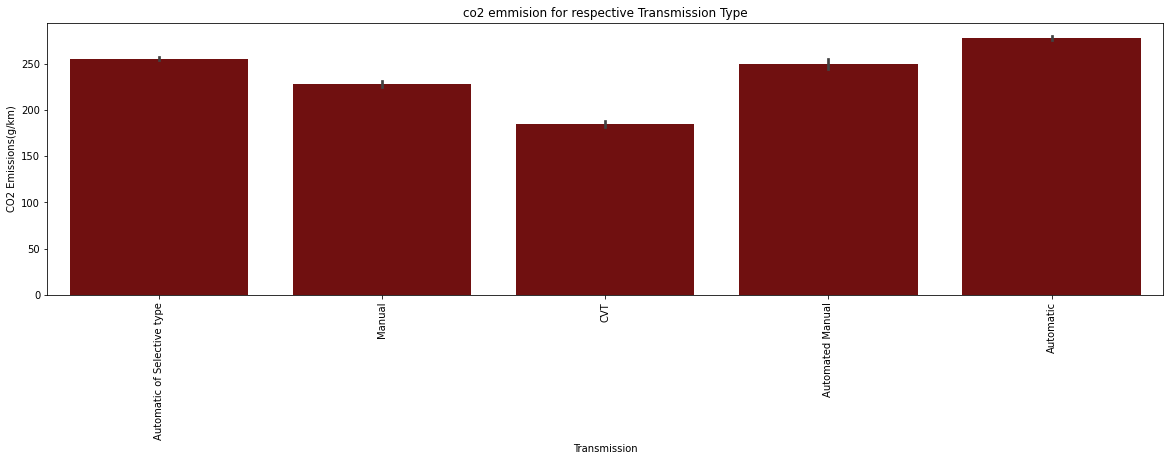

In [36]:
#Barplot for Transmission  vs. Emission 
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Transmission', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective Transmission Type')
plt.xticks(rotation=90)
plt.show()

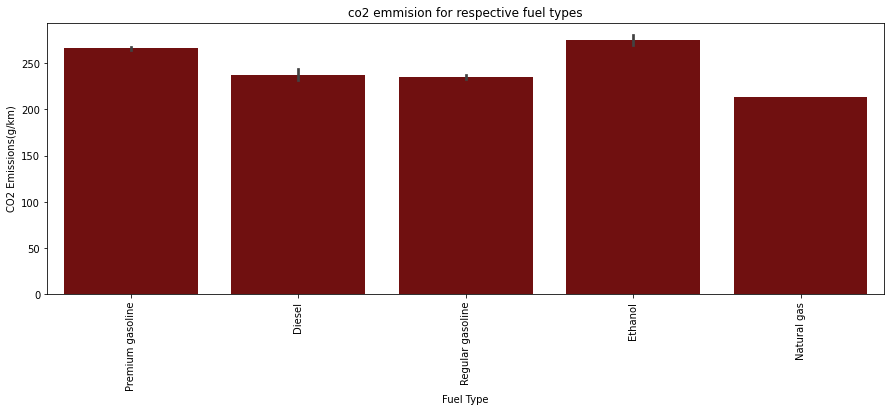

In [37]:
#BarPlot for FUel type vs. Emission
f, ax = plt.subplots(figsize=(15,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Fuel Type', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective fuel types')
plt.xticks(rotation=90)
plt.show()

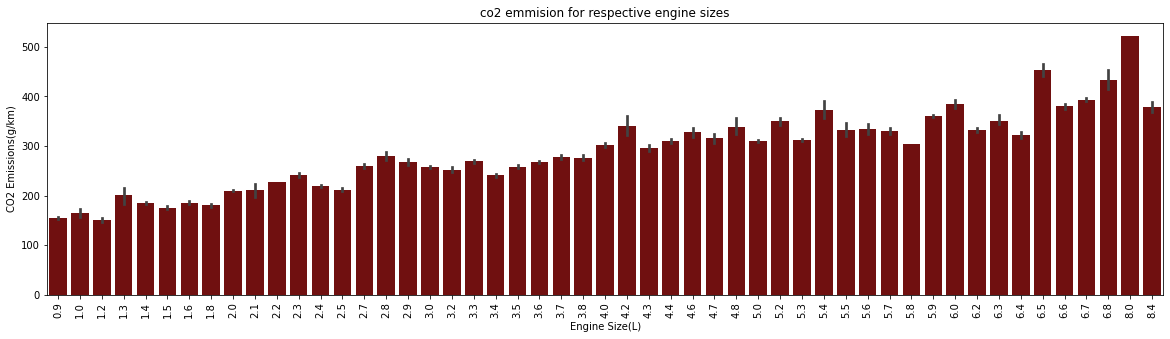

In [38]:
#Barplot for Engine Size(L) vs. Emission 
f, ax = plt.subplots(figsize=(20,5))
x = dataset.Make.value_counts().sort_values()
ax = sns.barplot(data=dataset,x='Engine Size(L)', y='CO2 Emissions(g/km)',color='maroon')
plt.title('co2 emmision for respective engine sizes')
plt.xticks(rotation=90)
plt.show()

Data Distribution for each feature 

In [39]:
cel =dataset['Cylinders'].value_counts().reset_index()
fig = px.pie(cel, values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()

In [40]:
cel =dataset['Fuel Type'].value_counts().reset_index()
fig = px.pie(cel, values='Fuel Type', names='index')
fig.update_layout(title="Fuel Type")
fig.show()

In [41]:
cel =dataset['Engine Size(L)'].value_counts().reset_index()
fig = px.pie(cel, values='Engine Size(L)', names='index')
fig.update_layout(title="Engine Size(L)")
fig.show()

In [42]:
cel =dataset['Make'].value_counts().reset_index()
fig = px.pie(cel, values='Make', names='index')
fig.update_layout(title="Make")
fig.show()

In [43]:
cel =dataset['Vehicle Class'].value_counts().reset_index()
fig = px.pie(cel, values='Vehicle Class', names='index')
fig.update_layout(title="Vehicle Class")
fig.show()

In [44]:
cel =dataset['Transmission'].value_counts().reset_index()
fig = px.pie(cel, values='Transmission', names='index')
fig.update_layout(title="Transmission")
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a5e33c0d0>,
      dtype=object)

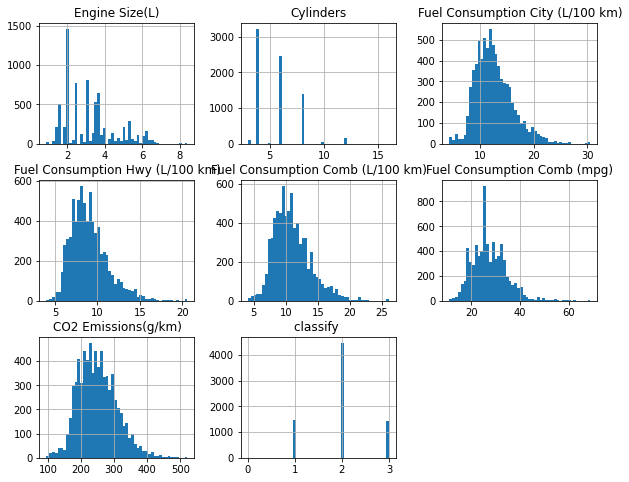

In [45]:
dataset.hist(figsize=(10,8),bins=50)

In [46]:
#dataset.rename(columns = {'CO2 Emissions(g/km)':'emissions'}, inplace = True)
#iw = (emissions.max()- emissions.min())/4

####  FREQUENCY DISTRIBUTION

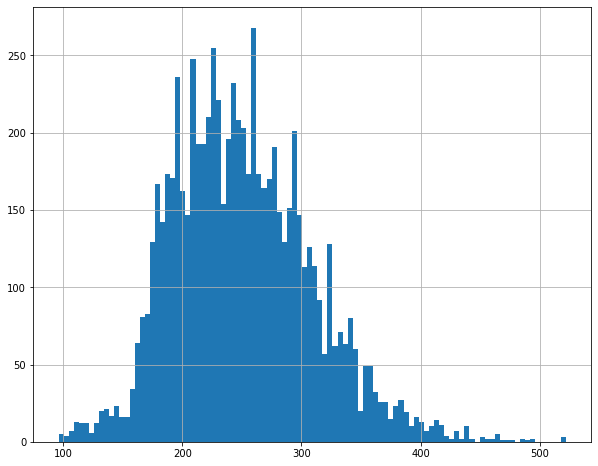

In [47]:
dataset['CO2 Emissions(g/km)'].hist(figsize=(10,8),bins=100)

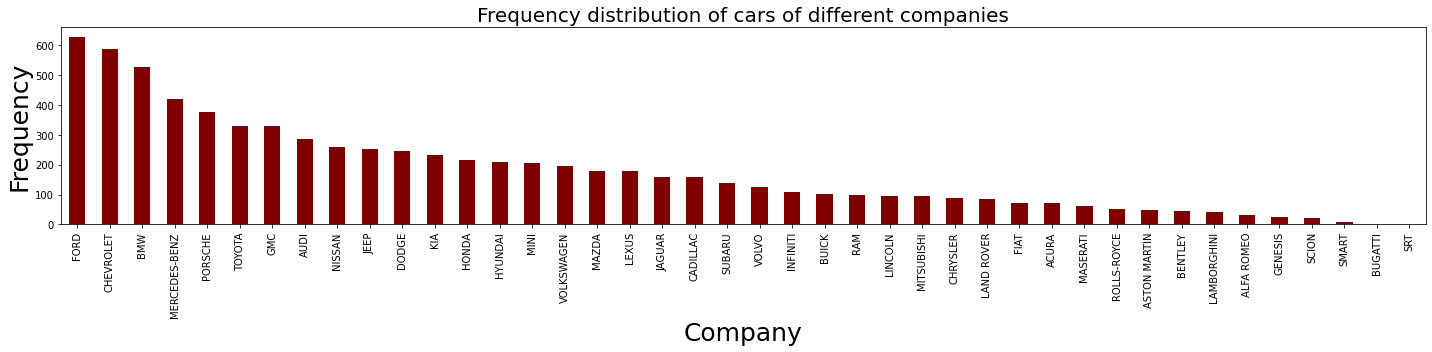

In [48]:
plt.figure(figsize=(20,5))
dataset.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of cars of different companies', fontsize=20)
plt.xlabel('Company', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

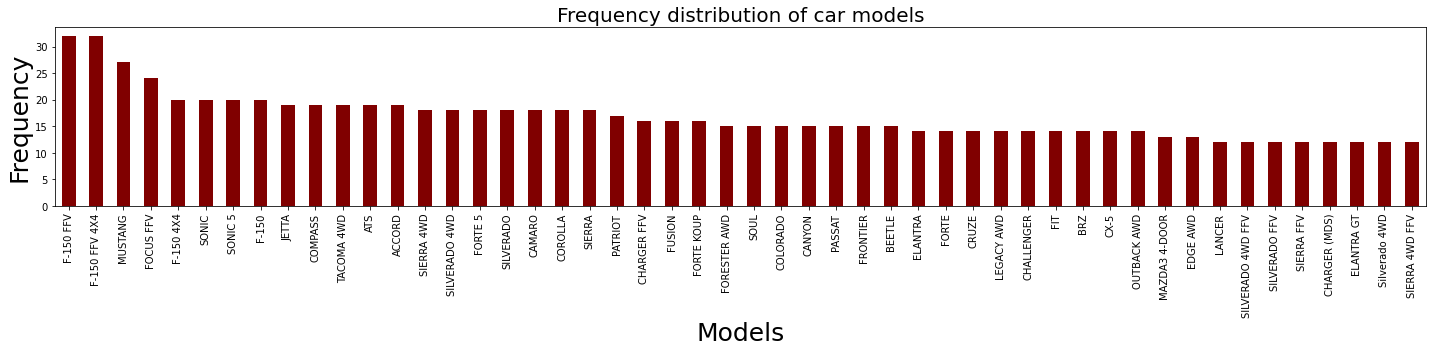

In [49]:
plt.figure(figsize=(20,5))
dataset.groupby('Model')['Model'].count().sort_values(ascending=False)[:50].plot(kind='bar',color='maroon')
plt.title('Frequency distribution of car models', fontsize=20)
plt.xlabel('Models', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

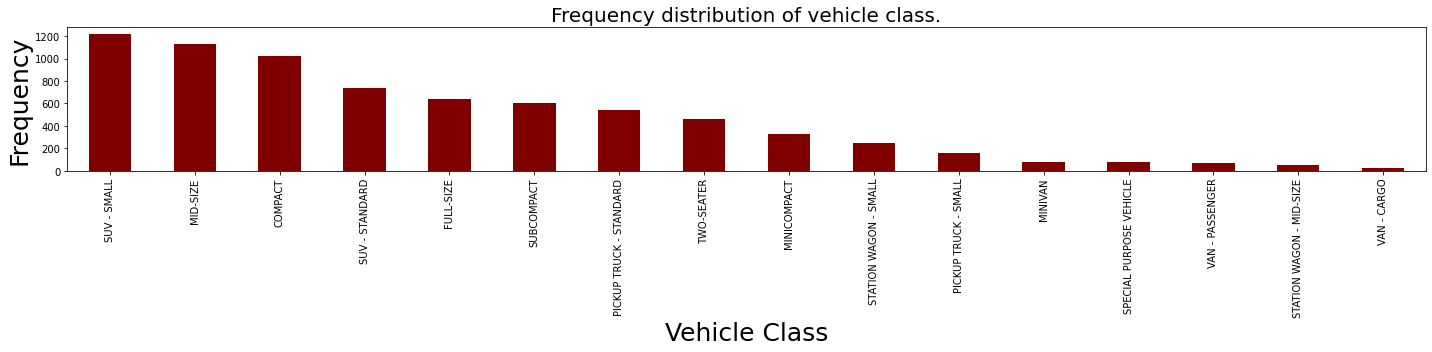

In [50]:
plt.figure(figsize=(20,5))
dataset.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of vehicle class.', fontsize=20)
plt.xlabel('Vehicle Class', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

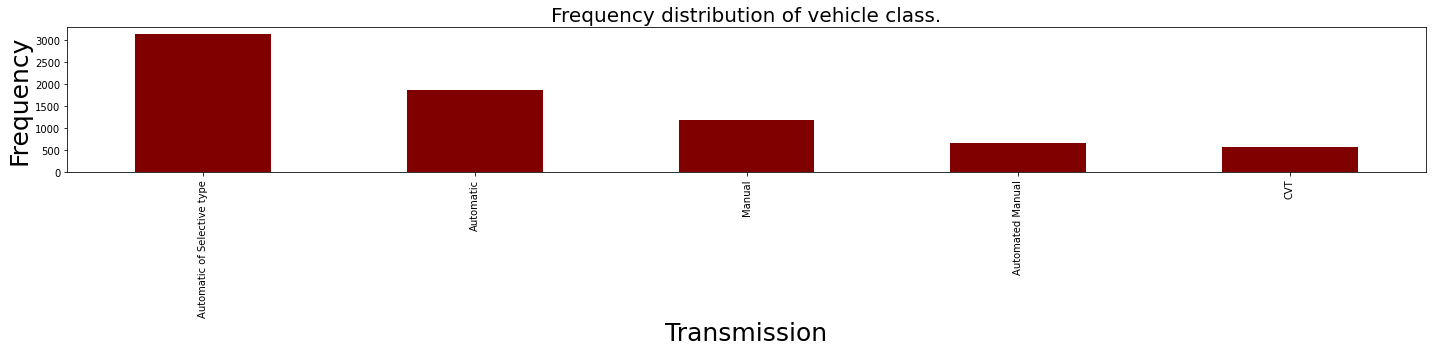

In [51]:
plt.figure(figsize=(20,5))
dataset.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of vehicle class.', fontsize=20)
plt.xlabel('Transmission', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

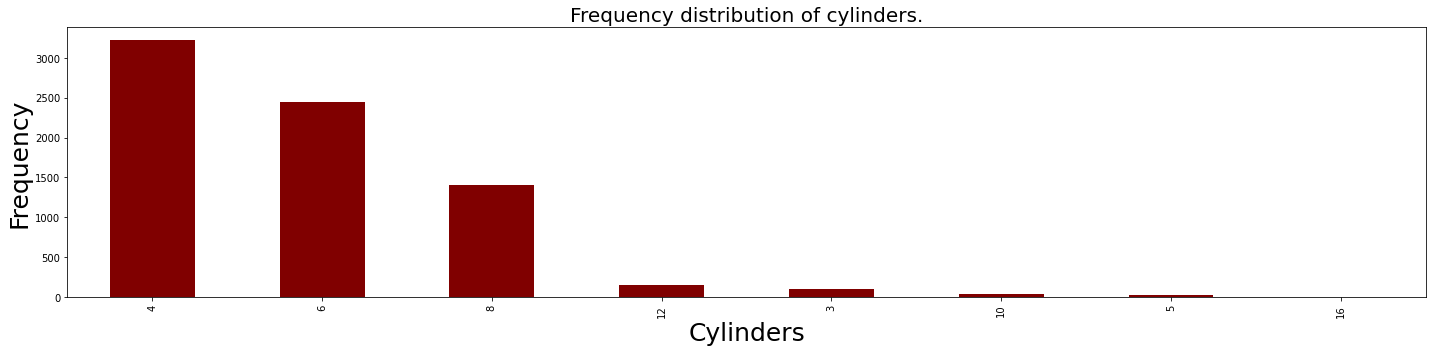

In [52]:
plt.figure(figsize=(20,5))
dataset.groupby('Cylinders')['Cylinders'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of cylinders.', fontsize=20)
plt.xlabel('Cylinders', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

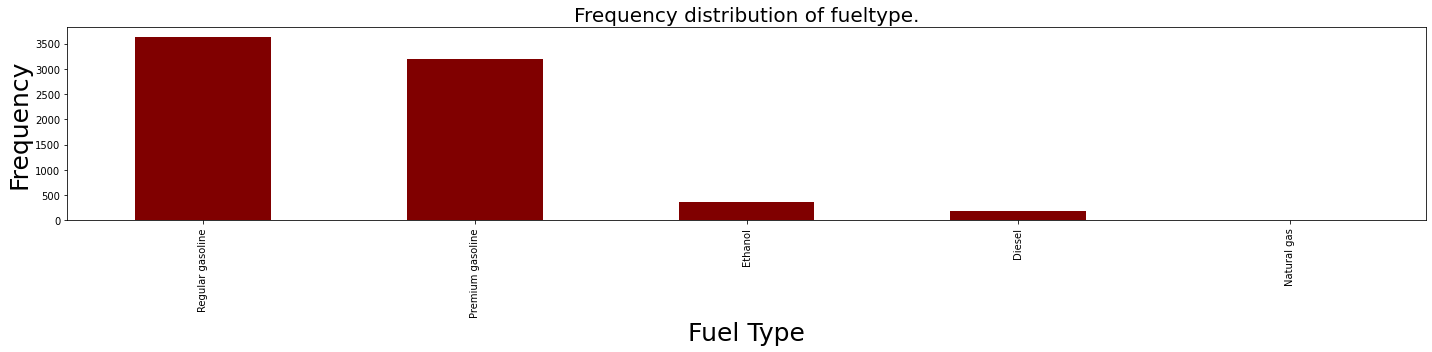

In [53]:
plt.figure(figsize=(20,5))
dataset.groupby('Fuel Type')['Fuel Type'].count().sort_values(ascending=False).plot(kind='bar',color='maroon')
plt.title('Frequency distribution of fueltype.', fontsize=20)
plt.xlabel('Fuel Type', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####DATA - rough

In [54]:
from sklearn.preprocessing import StandardScaler
X = dataset[['Engine Size(L)','Cylinders',
            'Fuel Consumption City (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)',
             'Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Comb (mpg)']]
y = dataset['CO2 Emissions(g/km)']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))
lin_pred

18.38


,pred_values,real_values
0,249.53,241.0
1,203.67,229.0
2,261.48,253.0
3,189.31,183.0
4,242.98,231.0
...,...,...
1472,307.68,297.0
1473,304.86,248.0
1474,235.08,242.0
1475,146.64,138.0


mean diff:  11.353249830737987


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



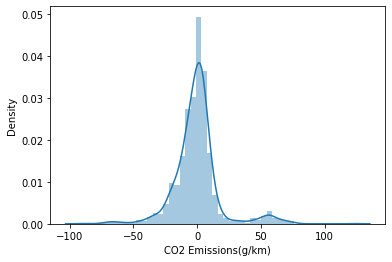

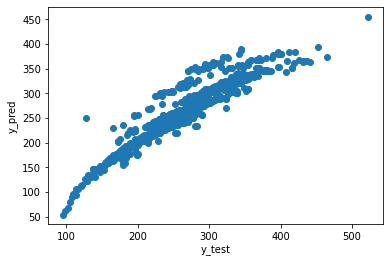

In [56]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])
print('mean diff: ', (abs(lin_pred['diff']).mean()))
sns.distplot(y_pred-y_test)
plt.show()
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


####Feature Selection 

chi square 

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(X, y)
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = X.columns
top_feat.sort_values(by='score', ascending=False)

,score,variables
5,13235.236391,Fuel Consumption Comb (mpg)
2,6230.860735,Fuel Consumption City (L/100 km)
4,4861.584394,Fuel Consumption Comb (L/100 km)
1,3411.646865,Cylinders
0,3393.381248,Engine Size(L)
3,3293.413062,Fuel Consumption Hwy (L/100 km)


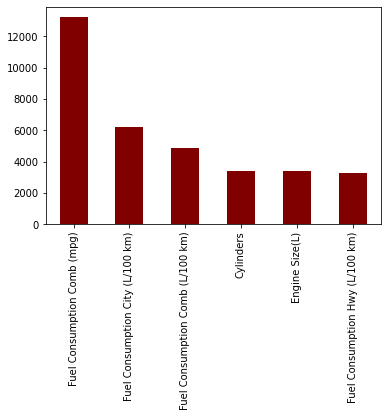

In [58]:
scores = chi2(X,y)
p_values = pd.Series(scores[0],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar(color='maroon')

####MODEL IMPLEMENTATION 1 
####Single Variable Linear Regression

#####Engine size vs CO2 Emission
Coefficients:  [[36.72767594]]
Intercept:  [134.54328591]
Mean absolute error: 23.41
Residual sum of squares (MSE): 944.78
R2-score: 0.63

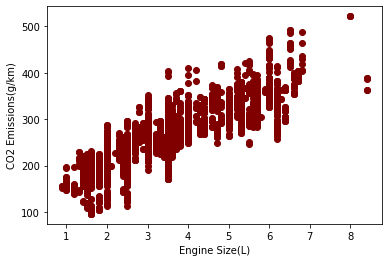

In [59]:
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.model_selection import train_test_split# features into variables engine= df[['ENGINESIZE']] 
co2 = dataset[['CO2 Emissions(g/km)']]
engine= dataset[['Engine Size(L)']]
# splitting the dataset

engine_treino, engine_test, co2_treino, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

# correlation between features on train dataset

plt.scatter(engine_treino, co2_treino, color='maroon')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]

Coefficients:  [[36.60960547]]
Intercept:  [135.12043187]
Mean absolute error: 23.72
Residual sum of squares (MSE): 1010.05
R2-score: 0.60


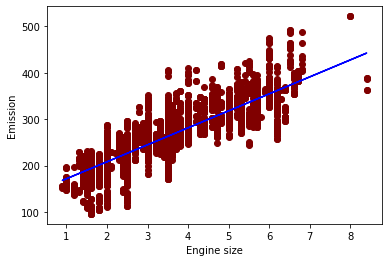

In [60]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
co2 = dataset[['CO2 Emissions(g/km)']]
engine= dataset[['Engine Size(L)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(engine, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Cylinders Vs CO2 emission 
Coefficients:  [[26.75167789]]
Intercept:  [100.57338865]
Mean absolute error: 24.35
Residual sum of squares (MSE): 1016.11
R2-score: 0.61

Coefficients:  [[26.45870822]]
Intercept:  [102.14082545]
Mean absolute error: 25.09
Residual sum of squares (MSE): 1129.10
R2-score: 0.52


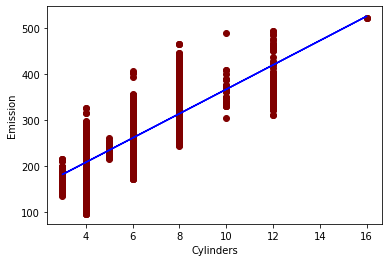

In [61]:
train_x = np.asanyarray(train[['Cylinders']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
co2 = dataset[['CO2 Emissions(g/km)']]
cylinder= dataset[['Cylinders']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(cylinder, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Cylinders']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption City (L/100 km) VS CO2Emissions(g/km)
Coefficients:  [[15.39762143]]
Intercept:  [57.29906769]
Mean absolute error: 14.69
Residual sum of squares (MSE): 563.04
R2-score: 0.81

Coefficients:  [[15.46328769]]
Intercept:  [56.50791001]
Mean absolute error: 15.20
Residual sum of squares (MSE): 614.63
R2-score: 0.81


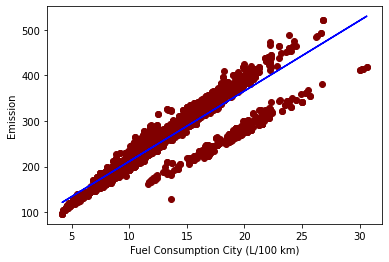

In [62]:
train_x = np.asanyarray(train[['Fuel Consumption City (L/100 km)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
co2 = dataset[['CO2 Emissions(g/km)']]
fuelcty= dataset[['Fuel Consumption City (L/100 km)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelcty, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption City (L/100 km)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption City (L/100 km)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption Hwy (L/100 km) VS CO2 Emissions(g/km)

Coefficients:  [[23.24703636]]
Intercept:  [40.40326451]
Mean absolute error: 18.65
Residual sum of squares (MSE): 788.00
R2-score: 0.71

Coefficients:  [[23.49513533]]
Intercept:  [38.2579224]
Mean absolute error: 19.36
Residual sum of squares (MSE): 844.93
R2-score: 0.73


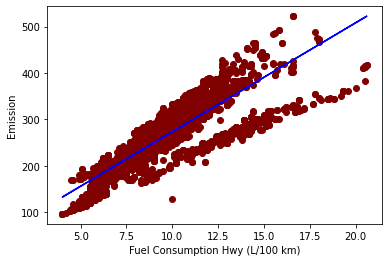

In [63]:
train_x = np.asanyarray(train[['Fuel Consumption Hwy (L/100 km)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
co2 = dataset[['CO2 Emissions(g/km)']]
fuelhwy= dataset[['Fuel Consumption Hwy (L/100 km)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelhwy, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption Hwy (L/100 km)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption Hwy (L/100 km)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption Comb (L/100 km) Vs CO2 Emissions(g/km) 
Coefficients:  [[18.59172357]]
Intercept:  [46.58311102]
Mean absolute error: 14.42
Residual sum of squares (MSE): 570.94
R2-score: 0.81

Coefficients:  [[18.7178313]]
Intercept:  [45.26589836]
Mean absolute error: 14.98
Residual sum of squares (MSE): 626.64
R2-score: 0.81


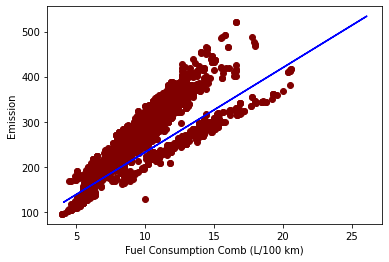

In [64]:
train_x = np.asanyarray(train[['Fuel Consumption Comb (L/100 km)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
co2 = dataset[['CO2 Emissions(g/km)']]
fuelcom= dataset[['Fuel Consumption Comb (L/100 km)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelhwy, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption Comb (L/100 km)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

#####Fuel Consumption Comb (mpg) Vs CO2 Emissions(g/km)
Coefficients:  [[-7.30919248]]
Intercept:  [451.4641556]
Mean absolute error: 16.86
Residual sum of squares (MSE): 652.94
R2-score: 0.76


Coefficients:  [[-7.31634998]]
Intercept:  [451.53692219]
Mean absolute error: 17.00
Residual sum of squares (MSE): 679.11
R2-score: 0.76


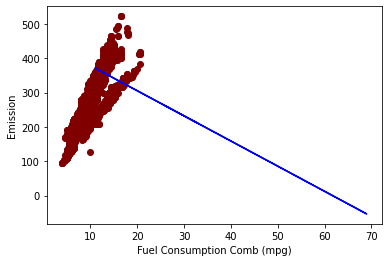

In [65]:
train_x = np.asanyarray(train[['Fuel Consumption Comb (mpg)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
co2 = dataset[['CO2 Emissions(g/km)']]
fuelcom= dataset[['Fuel Consumption Comb (mpg)']]
# splitting the dataset

# correlation between features on train dataset

plt.scatter(fuelhwy, co2, color='maroon')

#plt.scatter(train.engine_size, train.CO2_Emission, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')
plt.xlabel("Fuel Consumption Comb (mpg)")
plt.ylabel("Emission")
test_x = np.asanyarray(test[['Fuel Consumption Comb (mpg)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

####Multivariable Linear Regression


######Fuel consumption city, fuel consumption hwy, fuel consumption comb 
R2 score 0.85

In [66]:
scaler = MinMaxScaler()
#high correlation Fuel Consumption Hwy (L/100 km) to CO2 Emission

dataset_scale = dataset[['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X =  dataset_scale[['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption Comb (L/100 km)']]
CO2_Emission = dataset_scale[['CO2 Emissions(g/km)']]

# splitting the dataset

X_train, X_test, Y_train, Y_test= train_test_split(X, CO2_Emission, test_size = 0.33, random_state=1)

# correlation between features on train dataset
X_train.shape 


(4947, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



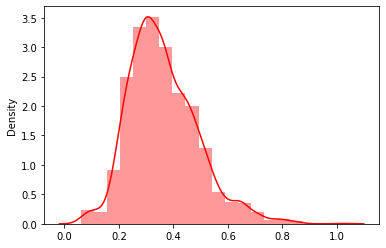

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



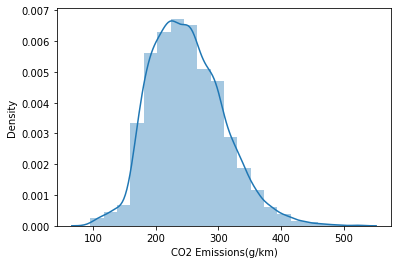

Coefficients:  [[ 0.18 -0.19  0.97]]
Intercept:  [0.06]
------------------------------------------------
R2 Score for test dataset :  0.85
R2 Score for training data to observe :  0.85
------------------------------------------------
RMSE for test dataset :  0.05
RMSE for training data to observe :  0.05


In [67]:
lr = LinearRegression().fit(X_train, Y_train)
y_pred = lr.predict(X_test)
#print("y_predicted",y_pred);
y_predt = lr.predict(X_train)
lr_scoret = r2_score(Y_train, y_predt)
lr_score = r2_score(Y_test, y_pred)
lr_rmse = mean_squared_error(Y_test, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_train, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2 Emissions(g/km)'], bins=20)
plt.show()
print("Coefficients: ", lr.coef_.round(2))
print("Intercept: ", lr.intercept_.round(2))
print("------------------------------------------------")
print("R2 Score for test dataset : ", lr_score.round(2))
print("R2 Score for training data to observe : ", lr_scoret.round(2))
print("------------------------------------------------")
print("RMSE for test dataset : ", lr_rmse.round(2))
print("RMSE for training data to observe : ", lr_rmse.round(2))

#####Engine Size(L), Fuel Consumption Hwy (L/100 km), Cylinders, CO2 Emissions(g/km)
R2 Score for test dataset :  0.8627936793139621.
R2 Score for training data to observe :  0.8686224526753902
RMSE for test dataset :  0.0506273757994802
RMSE for training data to observe :  0.0506273757994802

In [68]:
scaler = MinMaxScaler()
#high correlation Fuel Consumption Hwy (L/100 km) to CO2 Emission

dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Hwy (L/100 km)',
                         'Cylinders', 'CO2 Emissions(g/km)']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X =  dataset_scale[['Engine Size(L)','Fuel Consumption Hwy (L/100 km)',
                         'Cylinders']]
CO2_Emission = dataset_scale[['CO2 Emissions(g/km)']]

# splitting the dataset

X_train, X_test, Y_train, Y_test= train_test_split(X, CO2_Emission, test_size = 0.33, random_state=1)

# correlation between features on train dataset
X_train.shape 


(4947, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



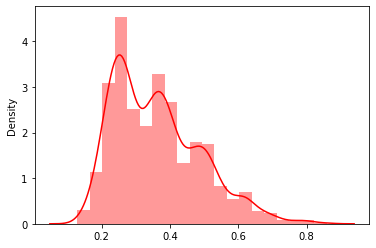

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



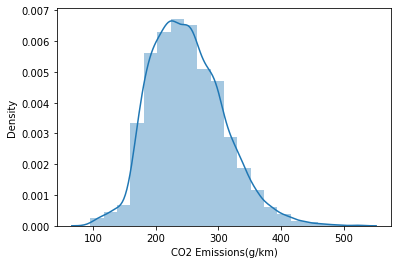

Coefficients:  [[0.12 0.57 0.28]]
Intercept:  [0.1]
------------------------------------------------
R2 Score for test dataset :  0.86
R2 Score for training data to observe :  0.87
------------------------------------------------
RMSE for test dataset :  0.05
RMSE for training data to observe :  0.05


In [69]:
lr = LinearRegression().fit(X_train, Y_train)
y_pred = lr.predict(X_test)
#print("y_predicted",y_pred);
y_predt = lr.predict(X_train)
lr_scoret = r2_score(Y_train, y_predt)
lr_score = r2_score(Y_test, y_pred)
lr_rmse = mean_squared_error(Y_test, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_train, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2 Emissions(g/km)'], bins=20)
plt.show()
print("Coefficients: ", lr.coef_.round(2))
print("Intercept: ", lr.intercept_.round(2))
print("------------------------------------------------")
print("R2 Score for test dataset : ", lr_score.round(2))
print("R2 Score for training data to observe : ", lr_scoret.round(2))
print("------------------------------------------------")
print("RMSE for test dataset : ", lr_rmse.round(2))
print("RMSE for training data to observe : ", lr_rmse.round(2))

#####Engine Size(L), Fuel Consumption Comb (L/100 km), Cylinders, CO2 Emissions(g/km)
R2 Score for test dataset :  0.878563586733978
R2 Score for training data to observe :  0.8794855860851092
RMSE for test dataset :  0.04762914915912338
RMSE for training data to observe :  0.04762914915912338

In [70]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (L/100 km)',
                         'Cylinders', 'CO2 Emissions(g/km)']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (L/100 km)',
                         'Cylinders']]
CO2_Emission = dataset_scale[['CO2 Emissions(g/km)']]

# splitting the dataset

X_train, X_test, Y_train, Y_test= train_test_split(X, CO2_Emission, test_size = 0.33, random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



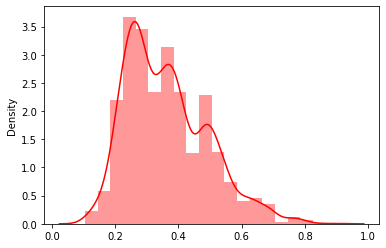

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



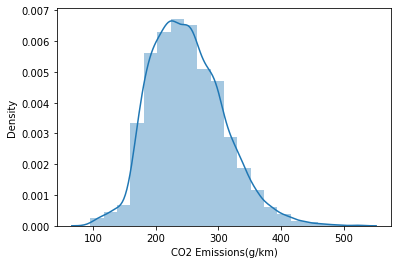

Coefficients:  [[0.12 0.57 0.28]]
Intercept:  [0.1]
------------------------------------------------
R2 Score for test dataset :  0.88
R2 Score for training data to observe :  0.88
------------------------------------------------
RMSE for test dataset :  0.05
RMSE for training data to observe :  0.05


In [71]:
linerreg = LinearRegression().fit(X_train, Y_train)

y_pred = linerreg.predict(X_test)
#print("y_predicted",y_pred);
#print("y_test",Y_test);
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2 Emissions(g/km)'], bins=20)
plt.show()
y_predt = linerreg.predict(X_train)
lr_scoret = r2_score(Y_train, y_predt)
lr_score = r2_score(Y_test, y_pred)
lr_rmse = mean_squared_error(Y_test, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_train, y_predt, squared = False)
print("Coefficients: ", lr.coef_.round(2))
print("Intercept: ", lr.intercept_.round(2))
print("------------------------------------------------")
print("R2 Score for test dataset : ", lr_score.round(2))
print("R2 Score for training data to observe : ", lr_scoret.round(2))
print("------------------------------------------------")
print("RMSE for test dataset : ", lr_rmse.round(2))
print("RMSE for training data to observe : ", lr_rmse.round(2))

#####Engine Size(L), Fuel Consumption Comb (mpg), Cylinders, CO2 Emissions(g/km)
R2 Score for test dataset :  0.893649643117298
R2 Score for training data to observe :  0.8940985507942552
RMSE for test dataset :  0.04457258619326664
RMSE for training data to observe :  0.04457258619326664

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



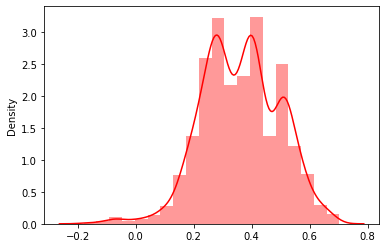

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



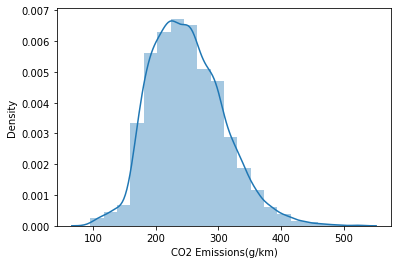

Coefficients:  [[0.12 0.57 0.28]]
Intercept:  [0.1]
------------------------------------------------
R2 Score for test dataset :  0.89
R2 Score for training data to observe :  0.89
------------------------------------------------
RMSE for test dataset :  0.04
RMSE for training data to observe :  0.04


In [72]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'CO2 Emissions(g/km)']]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders']]
CO2_Emission = dataset_scale[['CO2 Emissions(g/km)']]

# splitting the dataset

X_train, X_test, Y_train, Y_test= train_test_split(X, CO2_Emission, test_size = 0.33, random_state=1)
linerreg = LinearRegression().fit(X_train, Y_train)

y_pred = linerreg.predict(X_test)
#print("y_predicted",y_pred);
#print("y_test",Y_test);

y_predt = linerreg.predict(X_train)
lr_scoret = r2_score(Y_train, y_predt)
lr_score = r2_score(Y_test, y_pred)
lr_rmse = mean_squared_error(Y_test, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_train, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(dataset['CO2 Emissions(g/km)'], bins=20)
plt.show()
print("Coefficients: ", lr.coef_.round(2))
print("Intercept: ", lr.intercept_.round(2))
print("------------------------------------------------")
print("R2 Score for test dataset : ", lr_score.round(2))
print("R2 Score for training data to observe : ", lr_scoret.round(2))
print("------------------------------------------------")
print("RMSE for test dataset : ", lr_rmse.round(2))
print("RMSE for training data to observe : ", lr_rmse.round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



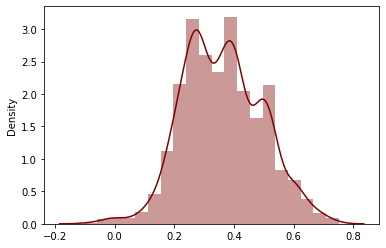

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



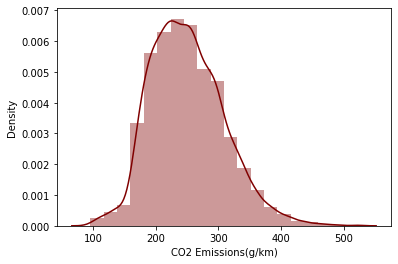

Coefficients:  [[0.12 0.57 0.28]]
Intercept:  [0.1]
------------------------------------------------
R2 Score for test dataset :  0.9
R2 Score for training data to observe :  0.9
------------------------------------------------
RMSE for test dataset :  0.04
RMSE for training data to observe :  0.04


In [73]:
dataset_scale = dataset[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders', 'CO2 Emissions(g/km)',
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
dataset_scale = pd.DataFrame(scaler.fit_transform(dataset_scale), columns = dataset_scale.columns)

X =  dataset_scale[['Engine Size(L)','Fuel Consumption Comb (mpg)',
                         'Cylinders',
                         'Fuel Consumption Comb (L/100 km)',
                         'Fuel Consumption Hwy (L/100 km)',
                         'Fuel Consumption City (L/100 km)'
                         ]]
CO2_Emission = dataset_scale[['CO2 Emissions(g/km)']]

# splitting the dataset

X_train, X_test, Y_train, Y_test= train_test_split(X, CO2_Emission, test_size = 0.33, random_state=1)
linerreg = LinearRegression().fit(X_train, Y_train)

y_pred = linerreg.predict(X_test)
#print("y_predicted",y_pred);
#print("y_test",Y_test);

y_predt = linerreg.predict(X_train)
lr_scoret = r2_score(Y_train, y_predt)
lr_score = r2_score(Y_test, y_pred)
lr_rmse = mean_squared_error(Y_test, y_pred, squared = False)
lr_rmset = mean_squared_error(Y_train, y_predt, squared = False)
sns.distplot(y_pred, bins=20,color='maroon')
plt.show()
sns.distplot(dataset['CO2 Emissions(g/km)'], bins=20, color='maroon')
plt.show()
print("Coefficients: ", lr.coef_.round(2))
print("Intercept: ", lr.intercept_.round(2))
print("------------------------------------------------")
print("R2 Score for test dataset : ", lr_score.round(2))
print("R2 Score for training data to observe : ", lr_scoret.round(2))
print("------------------------------------------------")
print("RMSE for test dataset : ", lr_rmse.round(2))
print("RMSE for training data to observe : ", lr_rmse.round(2))

In [74]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Text(0, 0.5, 'y_pred')

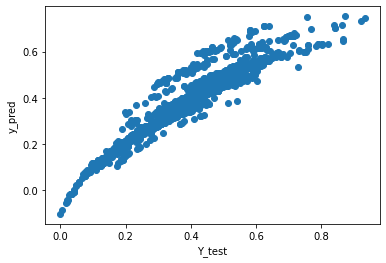

In [75]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred
plt.scatter( Y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('y_pred')

###Polynomial Regression

Quadratic Regression 

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])

test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

In [77]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_.round(2))
print ('Intercept: ',clf.intercept_.round(2))

Coefficients:  [[ 0.   54.34 -2.4 ]]
Intercept:  [107.45]


Text(0, 0.5, 'CO2 Emission')

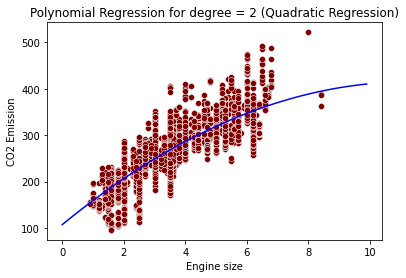

In [78]:
#plt.scatter(train.co2, train.engine , color='blue') 
ax = sns.scatterplot(data=dataset,x='Engine Size(L)', y='CO2 Emissions(g/km)',color='maroon')
#plt.scatter(train.Engine Size(L), train.CO2 Emissions(g/km),  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-b' )
plt.title('Polynomial Regression for degree = 2 (Quadratic Regression)')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

R2 Score for Polynomial Regression degree = 2

In [79]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.51
Residual sum of squares (MSE): 1001.34
R2-score: 0.60


Polynomial Regression with degree = 3

Coefficients:  [[ 0.   75.31 -8.36  0.51]]
Intercept:  [85.71]


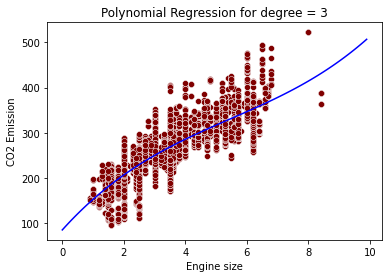

In [80]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_.round(2))
print ('Intercept: ',clf3.intercept_.round(2))
#plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

ax = sns.scatterplot(data=dataset,x='Engine Size(L)', y='CO2 Emissions(g/km)',color='maroon')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-b' )
plt.title('Polynomial Regression for degree = 3')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

R2 Score for degree = 3

In [81]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

Mean absolute error: 23.41
Residual sum of squares (MSE): 996.69
R2-score: 0.60


###Classification Method

#####data into calssified categories

In [82]:
datasetc = pd.read_csv('CO2 Emissions_dataset_classify.csv')

FileNotFoundError: ignored

In [ ]:
datasetc.info()

In [ ]:
datasetc.head()

#####Frequency Distribution for label categories

In [ ]:
#freq_dis_pos = datasetc['classify'].value_counts()
#freq_dis_pos
#pd.crosstab(index=datasetc['classify'], columns='count') 
#frequency Distribution
datasetc = pd.read_csv('CO2 Emissions_dataset_classify.csv')
print(datasetc.columns.tolist())
print ("Class  Frequency")
datasetc['classify '].value_counts().sort_index(ascending=True) 

In [ ]:
datasetc.shape

In [ ]:
print(datasetc.groupby('classify ').size())

In [ ]:
sns.countplot(datasetc['classify '],label="Frequency")
plt.show()

###CLASSIFICATION BASED MODELS


In [ ]:
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']

cmap = plt.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = Y, marker = '.', s=40, hist_kwds={'bins':20}, figsize=(17,17), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')

Split the data into test and train --> on what basis you divide

In [ ]:
# splitting the dataset
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

# correlation between features on train dataset
X_train.shape 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####logistic regression 

In [ ]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
Y.ravel()
logreg.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

#####Decision Tree

In [ ]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

#####KNN

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

#####Linear Discriminant Analysis

In [ ]:
#Linear Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

######Guassian Naive Bayes

In [ ]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

######SVM 


In [ ]:
#SVM 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))

In [ ]:
#decisision tree, KNN and SVm works best

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

pred = knn.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

####KNN plots 

In [ ]:
k = 2
print("k=",k)
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
ypredict2 = neigh2.predict(X_test)
print("Train set Accuracy: ", round(metrics.accuracy_score(Y_train, neigh2.predict(X_train)),2))
print("Test set Accuracy: ", round(metrics.accuracy_score(Y_test, ypredict2),2))

k = 5
print("k=",k)
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
ypredict5 = neigh5.predict(X_test)
print("Train set Accuracy: ",round(metrics.accuracy_score(Y_train, neigh5.predict(X_train)),2))
print("Test set Accuracy: ", round(metrics.accuracy_score(Y_test, ypredict5 ),2))


k = 10
print("k=",k)
neigh10 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
ypredict10 = neigh10.predict(X_test)
print("Train set Accuracy: ", round(metrics.accuracy_score(Y_train, neigh10.predict(X_train)),2))
print("Test set Accuracy: ",round(metrics.accuracy_score(Y_test, ypredict10 ),2))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

def plot_knn(X, Y, n_neighbors, weights):
    X_mat = X[['Engine Size(L)', 'Fuel Consumption City (L/100 km)']].values
    y_mat = Y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AFAFAF', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=Y_train, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='class 0')
    patch1 = mpatches.Patch(color='#00FF00', label='class 1')
    patch2 = mpatches.Patch(color='#0000FF', label='class 2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='class 3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('Engine Size(L)')
    plt.ylabel('Fuel Consumption Hwy(L/Km)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_knn(X_train, Y_train, 10, 'uniform')

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

def plot_knn(X, Y, n_neighbors, weights):
    X_mat = X[['Engine Size(L)', 'Fuel Consumption City (L/100 km)']].values
    y_mat = Y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AFAFAF', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=Y_train, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='class 0')
    patch1 = mpatches.Patch(color='#00FF00', label='class 1')
    patch2 = mpatches.Patch(color='#0000FF', label='class 2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='class 3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('Engine Size(L)')
    plt.ylabel('Fuel Consumption Hwy(L/Km)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_knn(X_train, Y_train, 10, 'uniform')

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

def plot_knn(X, Y, n_neighbors, weights):
    X_mat = X[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].values
    y_mat = Y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=Y_train, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='class 0')
    patch1 = mpatches.Patch(color='#00FF00', label='class 1')
    patch2 = mpatches.Patch(color='#0000FF', label='class 2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='class 3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('Engine Size(L)')
    plt.ylabel('Fuel Consumption Hwy(L/Km)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_knn(X_train, Y_train, 10, 'uniform')


from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

def plot_knn(X, Y, n_neighbors, weights):
    X_mat = X[['Engine Size(L)', 'Fuel Consumption City (L/100 km)']].values
    y_mat = Y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=Y_train, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='class 0')
    patch1 = mpatches.Patch(color='#00FF00', label='class 1')
    patch2 = mpatches.Patch(color='#0000FF', label='class 2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='class 3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('Engine Size(L)')
    plt.ylabel('Fuel Consumption Hwy(L/Km)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_knn(X_train, Y_train, 5, 'uniform')

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

def plot_knn(X, Y, n_neighbors, weights):
    X_mat = X[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].values
    y_mat = Y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=Y_train, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='class 0')
    patch1 = mpatches.Patch(color='#00FF00', label='class 1')
    patch2 = mpatches.Patch(color='#0000FF', label='class 2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='class 3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('Engine Size(L)')
    plt.ylabel('Fuel Consumption Hwy(L/Km)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_knn(X_train, Y_train, 1, 'uniform')

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

feature_name = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

X = datasetc[feature_name]
Y = datasetc['classify ']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y , test_size = 0.2, random_state=1)

def plot_knn(X, Y, n_neighbors, weights):
    X_mat = X[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].values
    y_mat = Y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=Y_train, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='class 0')
    patch1 = mpatches.Patch(color='#00FF00', label='class 1')
    patch2 = mpatches.Patch(color='#0000FF', label='class 2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='class 3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('Engine Size(L)')
    plt.ylabel('Fuel Consumption Hwy(L/Km)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_knn(X_train, Y_train, 10, 'uniform')

In [ ]:
# We can calculate the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc


# Plot the model accuracy for a different number of neighbors and best value for K
plt.plot(range(1,10),mean_acc,'r')
plt.fill_between(range(1,10),mean_acc - 1 * std_acc,mean_acc + 1 * 
                 std_acc, alpha=0.10)
plt.fill_between(range(1,10),mean_acc - 3 * std_acc,mean_acc + 3 *
                 std_acc, alpha=0.10,color="maroon")
plt.legend(('Accuracy ', '+/- 1 std','+/- 3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", round(mean_acc.max(),2), "with k=", mean_acc.argmax()+1) 

# Hint: Plot misclassification rate vs k and observe
ks = [1, 2, 5, 7, 10, 15, 20, 25, 50, 80]
train_errors = []
test_errors = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  train_errors.append(1 - knn.score(X_train, Y_train))
  test_errors.append(1 - knn.score(X_test, Y_test))
plt.figure()
plt.plot(ks, train_errors, 'bs:', label='train', color="green")
plt.plot(ks, test_errors, 'rx-', label='test', color ="maroon")
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.show()

In [ ]:
k = 1
print("k=",k)
neigh1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
ypredict1 = neigh1.predict(X_test)
print("Train set Accuracy: ", round(metrics.accuracy_score(Y_train, neigh1.predict(X_train)),2))
print("Test set Accuracy: ", round(metrics.accuracy_score(Y_test, ypredict1 ),2))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, ypredict1, labels=[1,0]))
print(classification_report(Y_test, ypredict1))



In [ ]:
cnf_matrix = confusion_matrix(Y_test, ypredict1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
import seaborn as sns

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


####IMP 
RENAME 
ds.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

HANDLING OTHER CATAGORICAL FEATURES HAVING MULTIPLE CATAGORIES (MAKE , MODEL, VEHICLE CLASS)

DIVIDING DATA SET INTO INDEPENDENT AND DEPENDENT VARIABLE

LASSO REGRESSION 
RIDGE REGRESSION 
DECISION TREE REGRESSION
RANDOM FOREST
SIMPLE VECTOR MACHINE


line plot : The lineplot shows a positive correlation between the size/power of the engine motor and the carbon emission. With some variation, we can say that the bigger the engine the greater the levels of CO2 emited.

###OTHER REGRESSION MODELS

####Decision Tree Regression 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, Y_train)

dsreg = model.predict(X_test)

print("Mean Squared Error",round(np.sqrt(mean_squared_error(Y_test,dsreg)),2))
print("R2 Score",round(r2_score(Y_test, dsreg),2))

####Simple Vector Machine

In [ ]:
from sklearn.svm import LinearSVR

model = LinearSVR()

model.fit(X_train, Y_train)

dsreg = model.predict(X_test)

print("Mean Squared Error",round(np.sqrt(mean_squared_error(Y_test,dsreg)),2))
print("R2 Score",round(r2_score(Y_test, dsreg),2))